In [ ]:
import pandas as pd
import numpy as np
#Imprimir la cantidad máxima de filas y columnas de un dataset
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


#Carga de DataSets

In [ ]:
anime= pd.read_csv("/content/drive/Othercomputers/Mi PC/#TP4/CSV/anime.csv")
anime.shape
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [ ]:
anime_with_synopsis= pd.read_csv("/content/drive/Othercomputers/Mi PC/#TP4/CSV/anime_with_synopsis.csv")
anime_with_synopsis.head()
anime_with_synopsis.shape

(16214, 5)

#Separación del Género en variables Dummies




In [ ]:
# Obtener una lista de géneros únicos
generos_unicos = np.unique(anime["Genres"].str.split(", ").explode())

# Crear variables dummies para cada género
generos_dummies = pd.get_dummies(anime["Genres"].str.split(", ", expand=True).stack()).sum(level=0)

# Unir el dataset original con las variables dummies
anime_con_dummies = pd.concat([anime, generos_dummies], axis=1)

# Eliminar la columna "Genres" original
anime_con_dummies.drop(columns=["Genres"], inplace=True)
anime_con_dummies.head(5)

<ipython-input-4-4f2cefb9b445>:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  generos_dummies = pd.get_dummies(anime["Genres"].str.split(", ", expand=True).stack()).sum(level=0)


,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,6,Trigun,8.24,Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#anime_con_dummies = anime_con_dummies.sort_values("Popularity")
#anime_con_dummies.head(25)

In [ ]:
anime_with_synopsis.shape

(16214, 5)

In [ ]:
anime_con_dummies.replace("Unknown", np.nan, inplace=True)

In [ ]:
anime_con_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          12421 non-null  object
 3   English name   6997 non-null   object
 4   Japanese name  17514 non-null  object
 5   Type           17525 non-null  object
 6   Episodes       17046 non-null  object
 7   Aired          17253 non-null  object
 8   Premiered      4745 non-null   object
 9   Producers      9768 non-null   object
 10  Licensors      3946 non-null   object
 11  Studios        10483 non-null  object
 12  Source         13995 non-null  object
 13  Duration       17007 non-null  object
 14  Rating         16874 non-null  object
 15  Ranked         15800 non-null  object
 16  Popularity     17562 non-null  int64 
 17  Members        17562 non-null  int64 
 18  Favorites      17562 non-n

#Probabilidad de ocurrencia por Género

##Conteo de animés por géneros

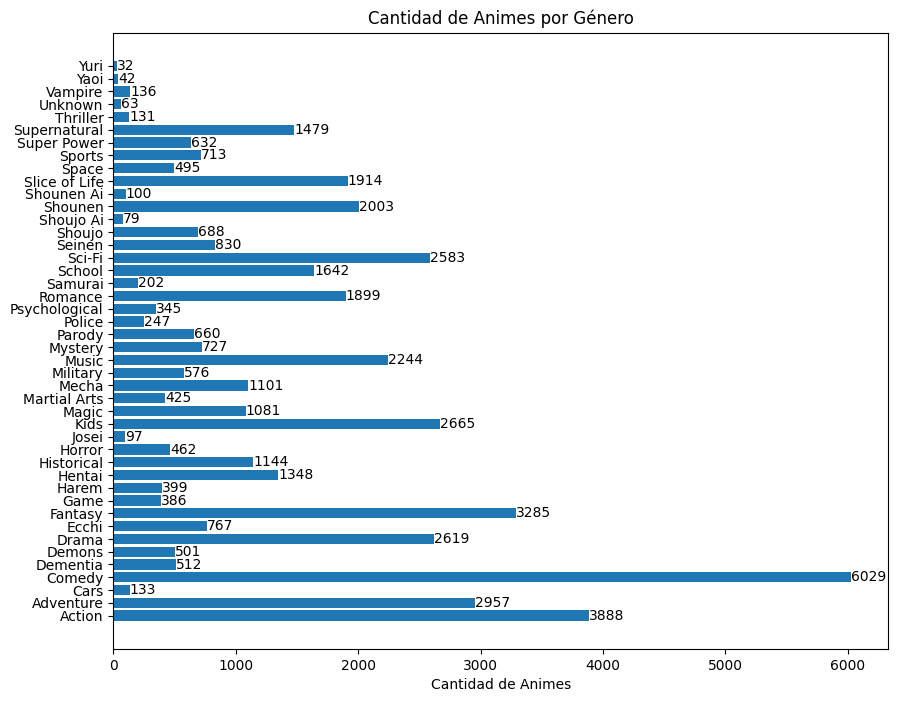

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame y que las columnas de género son las últimas
generos = anime_con_dummies.iloc[:, 34:] # reemplaza n con el número de columnas de género

# Suma las columnas para obtener la cantidad de animes por género
conteo_generos = generos.sum()

# Ordena la serie de forma descendente
#conteo_generos = conteo_generos.sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(10,8))
barras = plt.barh(conteo_generos.index, conteo_generos.values)
plt.xlabel('Cantidad de Animes')
plt.title('Cantidad de Animes por Género')

# Agrega las etiquetas a las barras
for barra in barras:
    x = barra.get_width()
    y = barra.get_y() + barra.get_height() / 2
    plt.text(x, y, str(int(x)), ha='left', va='center')

plt.show()

In [ ]:
generos = anime_con_dummies.iloc[:, 34:]

# Suma las columnas para obtener la cantidad de animes por género
conteo_generos = generos.sum()
conteo_generos.head()


Action       3888
Adventure    2957
Cars          133
Comedy       6029
Dementia      512
dtype: int64

In [ ]:
# Transforma la serie en un DataFrame
df_generos = conteo_generos.to_frame('Cantidad')

In [ ]:
# Calcula el total de animes en el DataFrame original
total_animes = len(anime_con_dummies)

# Agrega la columna 'Prob_Gen' al DataFrame 'df_generos'
df_generos['Prob_Gen'] = df_generos['Cantidad'] / total_animes

In [ ]:
df_generos.head()

,Cantidad,Prob_Gen
Action,3888,0.221387
Adventure,2957,0.168375
Cars,133,0.007573
Comedy,6029,0.343298
Dementia,512,0.029154


In [ ]:
#Obtener la suma de las probabilidades de ocurrencia para cada animé, en función de sus géneros.
#Parametrizar los valores de probabilidad para que la sumade todos los géneros sea 1
df_generos ["ProbP_Gen"]= df_generos['Prob_Gen'] / df_generos['Prob_Gen'].sum()
df_generos.head()

,Cantidad,Prob_Gen,ProbP_Gen
Action,3888,0.221387,0.077356
Adventure,2957,0.168375,0.058833
Cars,133,0.007573,0.002646
Comedy,6029,0.343298,0.119954
Dementia,512,0.029154,0.010187


In [ ]:
#Obtener la matriz de probabilidad de ocurrencia de cada animé segun su género
Prob = anime_con_dummies.iloc[:, 34:]*df_generos["ProbP_Gen"]
Prob.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,0.077356,0.058833,0.0,0.119954,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.000000,0.0,0.0,0.009849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.077356,0.000000,0.0,0.000000,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.014464,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.000000,0.0,0.0,0.009849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.077356,0.058833,0.0,0.119954,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.039852,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.077356,0.000000,0.0,0.000000,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021508,0.0,0.0,0.0,0.0,0.014464,0.0,0.004914,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.029426,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.058833,0.0,0.000000,0.0,0.0,0.000000,0.0,0.065359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.039852,0.0,0.0,0.000000,0.0,0.0,0.029426,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Suma todos los valores de una fila del DataFrame 'Prob'
suma_fila = Prob.sum(axis=1)

# Agrega los resultados a una columna nueva al final del DataFrame 'Prob'
# Para obtener la probailidad total de ocurrencia de cada animé segun su genero en una lista.
Prob['Suma_Fila'] = suma_fila

In [ ]:
Prob.head(5)

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila
0,0.077356,0.058833,0.0,0.119954,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.000000,0.0,0.0,0.009849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.369491
1,0.077356,0.000000,0.0,0.000000,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.014464,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.000000,0.0,0.0,0.009849,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.205169
2,0.077356,0.058833,0.0,0.119954,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.051392,0.0,0.0,0.0,0.039852,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.399495
3,0.077356,0.000000,0.0,0.000000,0.0,0.0,0.052108,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021508,0.0,0.0,0.0,0.0,0.014464,0.0,0.004914,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.029426,0.0,0.0,0.0,0.0,0.0,0.199777
4,0.000000,0.058833,0.0,0.000000,0.0,0.0,0.000000,0.0,0.065359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.039852,0.0,0.0,0.000000,0.0,0.0,0.029426,0.0,0.0,0.0,0.0,0.0,0.193470


In [ ]:
#Appendeo de  las probabilidades de ocurrencia de un animé segun sus Géneros a anime_con_dummies
anime_con_dummies = anime_con_dummies.join(Prob['Suma_Fila'])

In [ ]:
anime_con_dummies.head()

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.369491
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.205169
2,6,Trigun,8.24,Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.399495
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.199777
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",NaN,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.193470


#Parametrización de la popularidad del Animé

In [ ]:
#df_generos ["ProbP_Gen"]= df_generos['Prob_Gen'] / df_generos['Prob_Gen'].sum()
anime_con_dummies['Popul_Anim_Param'] = anime_con_dummies['Popularity']/ anime_con_dummies['Popularity'].sum()

In [ ]:
anime_con_dummies.head()

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila,Popul_Anim_Param
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.369491,2.534051e-07
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.205169,3.365740e-06
2,6,Trigun,8.24,Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.399495,1.306011e-06
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.199777,9.531931e-06
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",NaN,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.193470,2.838787e-05


#Ranking de Droppeos de series
Se debe evitar que la serie se abandone, para crear una filiación del usuario a la plataforma, con mayor permanencia, mayor recolección de gustos.

In [ ]:
#Creamos una nueva columna paraa determinar cual es el porcentaje de abandono por serie
anime_con_dummies ['%Droppeo'] = anime_con_dummies ['Dropped']/anime_con_dummies['Members']
anime_con_dummies['%Droppeo'].replace(0, 1, inplace=True)

In [ ]:
#Ahora en Función a las demas series ese porcentaje es alto o bajo
#Parametrización del porcentaje de abandono de la serie.
anime_con_dummies ['%Drop_Param'] = anime_con_dummies ['%Droppeo']/anime_con_dummies['%Droppeo'].sum()

In [ ]:
#Para que el valor más alto, afecte negativamente a la serie en el ranking, el factor debe ser su inverso.
anime_con_dummies ['%Drop_Param'] = 1/anime_con_dummies ['%Drop_Param']


#Ranking de OnHold
Dejar una serie en On Hold, implica que se ha dejado de ver la serie porque se está viendo algo mejor, por lo tanto, mientras mas chico sea es número, más atrapante la serie o pelicula, en comparación con el restoo del catálogo. Por lo que este indicador ayuda a generar Filiación con el usuario.

In [ ]:
#Creamos una nueva columna paraa determinar cual es el porcentaje de abandono PASIVO por serie
anime_con_dummies ['%OnHold'] = anime_con_dummies ['On-Hold']/anime_con_dummies['Members']
anime_con_dummies['%OnHold'].replace(0, 1, inplace=True) #evitar la pérdida del indicador

In [ ]:
#Ahora en Función a las demas series ese porcentaje es alto o bajo
#Parametrización del porcentaje de abandono PASIVO de la serie.
anime_con_dummies ['%OnH_Param'] = anime_con_dummies ['%OnHold']/anime_con_dummies['%OnHold'].sum()

In [ ]:
#Para que el valor más bajo, afecte positivamente a la serie en el ranking, el factor debe ser su inverso.
anime_con_dummies ['%OnH_Param'] = 1/anime_con_dummies ['%OnH_Param']

#Parametrización de "Plan to watch"
Planear ver una serie implica que previamente ha sido una buena recomendación y que se ha guardado, por lo tanto, afectar de manera positiva la posición de recomendados por este factor, sería una buena suposición.

In [ ]:
anime_con_dummies ['PTWatch_Param'] = anime_con_dummies ['Plan to Watch']/anime_con_dummies['Plan to Watch'].sum()

#Establecer jerarquía para una lista automática sin tener en cuenta la heterogeneidad de géneros
Con el siguientee indicador se generará una lista de los animés más recomendados para un nuevo usuario, Teniendo en cuenta:
  *Su Score
  *Popularidad
  *Las veces que fue una buena recomendación
  *Eliminando de la Lista, las series más abandonadas
  *Ponderando positivamente las series más atrapantes

Hay una diferencia en el orden de los factores utilizados para obtener el indicador final, . Se debe encontrar la manera de igualar el impacto de dichos factores, o incluso de incrementar el peso de ciertos criterios.


In [ ]:
#Transforma los valores de la columna 'anime_con_dummies['Score']' de tipo object a tipo float
anime_con_dummies['Score'] = anime_con_dummies['Score'].astype(float)

In [ ]:
#Estableceremos los rangos entre los que se mueven los valores utilizados
Rango_Parametros= [('Score_Param',
                  'PTWatch_Param',
                  '%OnH_Param',
                 'Popul_Anim_Param',
                  '%Drop_Param'),
                   (anime_con_dummies ['Score_Param'].min(),
                  anime_con_dummies['PTWatch_Param'].min(),
                  anime_con_dummies ['%OnH_Param'].min(),
                  anime_con_dummies ['Popul_Anim_Param'].min(),
                  anime_con_dummies ['%Drop_Param'].min()),(
                   anime_con_dummies ['Score_Param'].max(),
                  anime_con_dummies['PTWatch_Param'].max(),
                  anime_con_dummies ['%OnH_Param'].max(),
                  anime_con_dummies ['Popul_Anim_Param'].max(),
                  anime_con_dummies ['%Drop_Param'].max())]
#Rango_Parametros= Rango_Parametros.to_frame()
print(Rango_Parametros)

[('Score_Param', 'PTWatch_Param', '%OnH_Param', 'Popul_Anim_Param', '%Drop_Param'), (0.2013057671381937, 2.350005052510863e-06, 6.1409595863449625e-06, 6.1409595863449625e-06, 6.1409595863449625e-06), (1.0, 1.0, 1.0, 1.0, 1.0)]


In [ ]:
Rang_Param = pd.DataFrame(Rango_Parametros)
Rang_Param= Rang_Param.transpose()
# Asignar nombres a las columnas
Rang_Param.columns = ['Parametro', 'Minimo', 'Maximo']
Rang_Param

,Parametro,Minimo,Maximo
0,Score_Param,0.201306,1.0
1,PTWatch_Param,0.000002,1.0
2,%OnH_Param,0.000006,1.0
3,Popul_Anim_Param,0.000006,1.0
4,%Drop_Param,0.000006,1.0


In [ ]:
#Ahora conociendo el valor máximo para cada parámetro, se debiera parametrizar en referencia al maximo,
#para reducir el rango del parámetro a un valor entre 0 y 1.
anime_con_dummies ['Score_Param']= anime_con_dummies ['Score']/anime_con_dummies ['Score'].max()
anime_con_dummies['PTWatch_Param']= anime_con_dummies['PTWatch_Param']/anime_con_dummies['PTWatch_Param'].max()
anime_con_dummies ['%OnH_Param']= anime_con_dummies ['%OnH_Param']/anime_con_dummies ['%OnH_Param'].max()
anime_con_dummies ['Popul_Anim_Param']= anime_con_dummies ['%OnH_Param']/anime_con_dummies ['%OnH_Param'].max()
anime_con_dummies ['%Drop_Param']=anime_con_dummies ['%OnH_Param']/anime_con_dummies ['%OnH_Param'].max()

In [ ]:
anime_con_dummies ['Priori_AUTO'] = anime_con_dummies ['Score_Param']* anime_con_dummies['PTWatch_Param']*anime_con_dummies ['%OnH_Param']*anime_con_dummies ['Popul_Anim_Param']*anime_con_dummies ['%Drop_Param']

Es necesario eliminar los animés que den como resultado de la operación igual a cero, debido a que Score era desconocido y se reemplazó previamente por "NaN".

In [ ]:
# Elimina de anime_con_dummies los elementos que de la columna Score posean el valor nulo
#anime_con_dummies = anime_con_dummies.dropna(subset= ['Score'], inplace=True)

In [ ]:
anime_con_dummies.head(20)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Priori_AUTO,Score_Param
0,1,Cowboy Bebop,8.78,Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.369491,0.000108,0.021309,0.000108,0.057121,0.000108,0.775032,10.075501,0.955386
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.205169,0.000867,0.002819,0.000867,0.007084,0.000867,0.136216,1369.869262,0.912949
2,6,Trigun,8.24,Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.399495,0.000135,0.024914,0.000135,0.045562,0.000135,0.345258,23.278878,0.896627
3,7,Witch Hunter Robin,7.27,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.199777,0.000114,0.056800,0.000114,0.054086,0.000114,0.079240,12.712234,0.791077
4,8,Bouken Ou Beet,6.98,Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",NaN,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.193470,0.000106,0.083787,0.000106,0.057925,0.000106,0.007976,2.315905,0.759521
5,15,Eyeshield 21,7.95,NaN,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",Gallop,Manga,23 min. per ep.,PG-13 - Teens 13 or older,604.0,1003,148259,2066,13907,78349,14228,11573,30202,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.251348,0.000064,0.078059,0.000064,0.095967,0.000064,0.070975,3.491165,0.865071
6,16,Hachimitsu to Clover,8.06,Honey and Clover,ハチミツとクローバー,TV,24,"Apr 15, 2005 to Sep 27, 2005",Spring 2005,"Genco, Fuji TV, Shueisha","VIZ Media, Discotek Media",J.C.Staff,Manga,23 min. per ep.,PG-13 - Teens 13 or older,46

#Heterogeneización de los géneros propuestos
Teniendo en cuenta que no se conocen los gustos del nuevo usuario entonces entre las recomendaciones deben lo suficientemente heterogéneas como para que al menos 1 animé le interese.

##Popularidad del Género
Para establecer la proporción de la lista de los animés propuestos debe establecerse cuales son los géneros de animés mas populares y modificar la lista de manera tal que se reespete dicha distribución.

In [ ]:
#Repito los animés que pertencen a varios Géneross
# Transforma el DataFrame 'anime_con_dummies' de un formato ancho a uno largo
anime_largo = anime_con_dummies.melt(id_vars=['Name', 'Members','Priori_AUTO'], value_vars=generos.columns, var_name='genero', value_name='dummie')

# Filtra las filas que tengan un valor de 1
anime_largo = anime_largo[anime_largo['dummie'] == 1]
anime_largo.head()

,Name,Members,Priori_AUTO,genero,dummie
0,Cowboy Bebop,1251960,10.075501,Action,1
1,Cowboy Bebop: Tengoku no Tobira,273145,1369.869262,Action,1
2,Trigun,558913,23.278878,Action,1
3,Witch Hunter Robin,94683,12.712234,Action,1
5,Eyeshield 21,148259,3.491165,Action,1


In [ ]:
#agrupo por género
# Agrupa el DataFrame 'anime_largo' por la columna 'genero'
grupos = anime_largo.groupby('genero')

# Suma los valores de la columna 'Members' para cada grupo
miembros_por_genero = grupos['Members'].sum().to_frame().sort_values('Members', ascending= False)
miembros_por_genero.head(10)


,Members
genero,
Comedy,284687458
Action,272659189
Drama,175776823
Shounen,173209859
Fantasy,171849449
Romance,170043987
Supernatural,162117479
School,160682912
Adventure,133656801


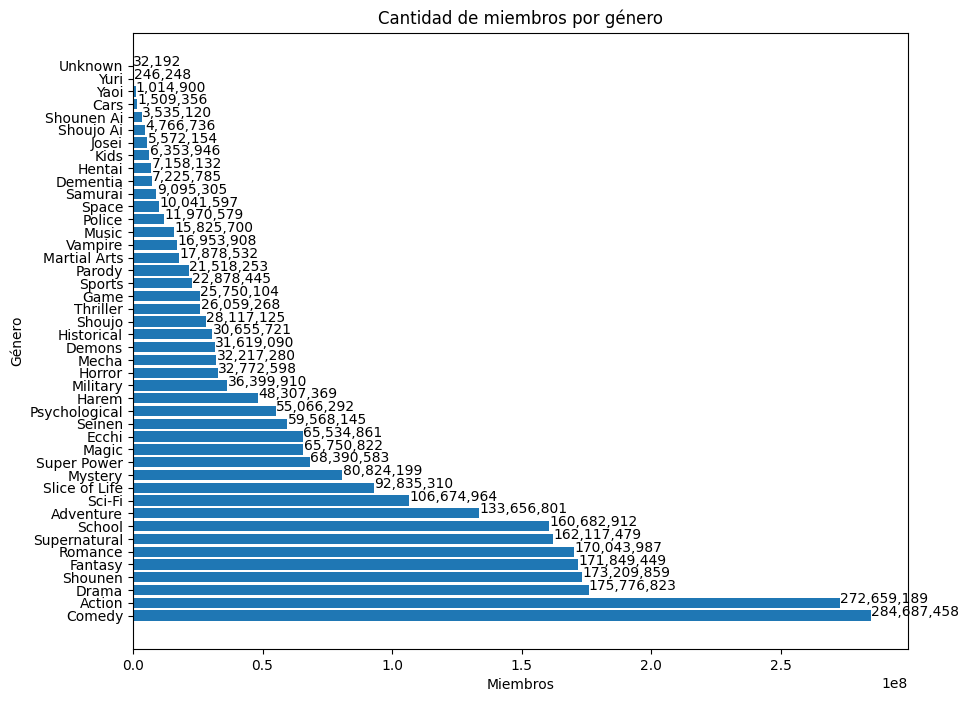

In [ ]:
#Genero el gráfico de popularidad

plt.figure(figsize=(10,8))
# Crea un gráfico de barras horizontales con la Serie 'miembros_por_genero'
barras = plt.barh(miembros_por_genero.index, miembros_por_genero['Members'])

# Agrega un título al gráfico
plt.title('Cantidad de miembros por género')

# Agrega una etiqueta al eje x
plt.xlabel('Miembros')

# Agrega una etiqueta al eje y
plt.ylabel('Género')

# Agrega una etiqueta del valor en cada barra
for barra in barras:
  # Obtiene la posición y el valor de la barra
  x = barra.get_width()
  y = barra.get_y()
  valor = int(x)

  # Agrega el texto con el valor de la barra
  plt.text(x + 100000, y + 0.4, f'{valor:,}')

# Muestra el gráfico
plt.show()

In [ ]:
#Encuentro el porcentaje del total que ven series de cada género
miembros_por_genero ['%del Total']=grupos['Members'].sum()/anime_con_dummies['Members'].sum()
#Parametrizo para conocer la cantidad de animés por género que debiera tener mi lista, dependiendo del número de recomendaciones
miembros_por_genero['%List_Recom']= miembros_por_genero['%del Total']/miembros_por_genero['%del Total'].sum()

In [ ]:
miembros_por_genero.head()

,Members,%del Total,%List_Recom
genero,,,
Comedy,284687458,0.467718,0.103342
Action,272659189,0.447957,0.098976
Drama,175776823,0.288787,0.063807
Shounen,173209859,0.284570,0.062876
Fantasy,171849449,0.282334,0.062382


##Como el mayor porcentaje no supera el 10 % entonces la lista debiera,al menos, tener un capítulo de cada género que encabeza la lista de géneros más populares.

#Obtención de la Lista
Se establecerá una lista que tendrá 3 niveles de profundidad según:
>Una Lista genérica que se utilizará como base habiendo tenido en cuenta todos los aspectos mencionados para generar la jerarquia de una Lista automática<
Una Lista que Priorice sólo los géneros seleccionados de una lista de preferencia del nuevo usuario<
>Una Lista automática mejorada que respete una distibución de acuerdo a la popularidad de cadaa género.<

##Lista automática de recomendación de animés


In [ ]:
#Todos los valores de importancia quedaron guardados en el Dataset anime_largo y
#Primera lista sale de simplemente ordenar los valores según el indicador generado previamente
#df = df.loc[df['nombre_de_tu_columna'] == 'Movie']
ListAuto_Mov = anime_con_dummies.loc[anime_con_dummies['Type']=='Movie']
ListAuto_Mov= ListAuto_Mov.sort_values('Priori_AUTO', ascending=False)
ListAuto_Mov.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Priori_AUTO,Score_Param
11308,32281,Kimi no Na wa.,8.96,Your Name.,君の名は。,Movie,1,"Aug 26, 2016",NaN,"Toho, Sound Team Don Juan, Amuse, JR East Mark...","Funimation, NYAV Post",CoMix Wave Films,Original,1 hr. 46 min.,PG-13 - Teens 13 or older,16.0,11,1726660,71054,40773,1462143,4746,2463,216535,516874.0,333022.0,200239.0,86314.0,29641.0,12257.0,5199.0,2131.0,1116.0,3966.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.151987,0.002234,0.001426,0.002234,0.002749,0.002234,0.508858,5.532678e-09,0.974973
9886,28851,Koe no Katachi,9.00,A Silent Voice,聲の形,Movie,1,"Sep 17, 2016",NaN,"Shochiku, Pony Canyon, Kodansha, ABC Animation...","Eleven Arts, NYAV Post",Kyoto Animation,Manga,2 hr. 10 min.,PG-13 - Teens 13 or older,11.0,28,1387607,62452,30379,1151644,4306,1949,199329,393684.0,295492.0,156604.0,61581.0,19228.0,7135.0,3108.0,1242.0,698.0,2071.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.124629,0.001979,0.001405,0.001979,0.003103,0.001979,0.468424,3.555104e-09,0.979325
176,199,Sen to Chihiro no Kamikakushi,8.83,Spirited Away,千と千尋の神隠し,Movie,1,"Jul 20, 2001",NaN,Toho,"Walt Disney Studios, GKIDS",Studio Ghibli,Original,2 hr. 5 min.,PG - Children,23.0,41,1245727,25610,14444,1124666,3124,1437,102056,324768.0,254426.0,182709.0,76025.0,22207.0,7695.0,2393.0,856.0,489.0,1174.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.140367,0.002449,0.001154,0.002449,0.002508,0.002449,0.239832,3.383739e-09,0.960827
404,431,Howl no Ugoku Shiro,8.67,Howl's Moving Castle,ハウルの動く城,Movie,1,"Nov 20, 2004",NaN,"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,Novel,1 hr. 59 min.,G - All Ages,51.0,98,847414,17845,8733,754791,2283,947,80660,186983.0,167309.0,137336.0,62317.0,18427.0,6427.0,2246.0,737.0,351.0,668.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.214082,0.002279,0.001118,0.002279,0.002694,0.002279,0.189551,2.117915e-09,0.943417
13962,36946,Dragon Ball Super Movie: Broly,8.10,Dragon Ball Super:Broly,ドラゴンボール超（スーパー） ブロリー,Movie,1,"Dec 14, 2018",NaN,"Shueisha, Echoes",Funimation,Toei Animation,Manga,1 hr. 40 min.,PG-13 - Teens 13 or older,412.0,711,207325,1612,2941,178600,443,378,24963,23524.0,33786.0,42538.0,24343.0,8594.0,3239.0,1298.0,500.0,303.0,370.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.262430,0.002874,0.001823,0.002874,0.002137,0.002874,0.058663,1.227404e-09,0.881393
490,523,Tonari no Totoro,8.31,My Neighbor Totoro,となりのトトロ,Movie,1,"Apr 16, 1988",NaN,Studio Fantasia,"Walt Disney Studios, GKIDS",Studio Ghibli,Original,1 hr. 26 min.,G - All Ages,220.0,121,721786,6751,7968,620070,2444,1109,90195,107172.0,114886.0,129486.0,75924.0,25715.0,8966.0,2519.0,804.0,351.0,621.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.208213,0.001814,0.001536,0.001814,0.003386,0.001814,0.211959,1.143319e-09,0.904244
142,164,Mononoke Hime,8.72,Princess Mononoke,もののけ姫,Movie,1,"Jul 12, 1997",NaN,"Tokuma Shoten, Nippon Television Network",GKIDS,Studio Ghibli,Original,2 hr. 15 min.,PG-13 - Teens 13 or older,40.0,91,876813,17114,11422,735624,3384,1386,124997,184173.0,167754.0,131050.0,57874.0,

In [ ]:
ListAuto_TV = anime_con_dummies.loc[anime_con_dummies['Type']=='TV']
ListAuto_TV= ListAuto_TV.sort_values('Priori_AUTO', ascending=False)
ListAuto_TV.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Priori_AUTO,Score_Param
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity),4.0,63,1073626,40985,54607,906824,5533,3099,103563,327290.0,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.273174,0.001192,0.002886,0.001192,0.005154,0.001192,0.243374,4.077416e-10,0.990207
15674,39551,Tensei shitara Slime Datta Ken 2nd Season,8.06,That Time I Got Reincarnated as a Slime Season 2,転生したらスライムだった件,TV,12,"Jan 12, 2021 to 2021",Winter 2021,NaN,NaN,8bit,Light novel,23 min. per ep.,PG-13 - Teens 13 or older,461.0,402,341178,4258,173043,35,2680,1235,164185,8743.0,10266.0,16371.0,9928.0,2832.0,967.0,324.0,153.0,61.0,171.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.185313,0.000782,0.003620,0.000782,0.007855,0.000782,0.385836,1.616848e-10,0.877040
13252,35760,Shingeki no Kyojin Season 3,8.59,Attack on Titan Season 3,進撃の巨人 Season3,TV,12,"Jul 23, 2018 to Oct 15, 2018",Summer 2018,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity),76.0,48,1212430,14971,62604,991045,10271,6048,142462,194692.0,256697.0,215524.0,78551.0,19822.0,6215.0,2442.0,967.0,459.0,1285.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.273174,0.000725,0.004988,0.000725,0.008471,0.000725,0.334786,1.192027e-10,0.934712
15926,40028,Shingeki no Kyojin: The Final Season,9.17,Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",Winter 2021,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,MAPPA,Manga,23 min. per ep.,R - 17+ (violence & profanity),2.0,119,733260,44862,566239,553,6658,2090,157720,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.273174,0.000676,0.002850,0.000676,0.009080,0.000676,0.370643,1.144091e-10,0.997824
16401,40852,Dr. Stone: Stone Wars,8.29,NaN,ドクターストーン STONE WARS,TV,11,"Jan 14, 2021 to ?",Winter 2021,"TOHO animation, Shueisha",Funimation,TMS Entertainment,Manga,24 min. per ep.,PG-13 - Teens 13 or older,229.0,325,414084,4520,229258,65,4047,1238,179476,13294.0,18243.0,25120.0,11682.0,2699.0,776.0,218.0,100.0,55.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.150077,0.000628,0.002990,0.000628,0.009773,0.000628,0.421770,9.438189e-11,0.902067
11624,32935,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.87,Haikyu!! 3rd Season,ハイキュー!! 烏野高校 VS 白鳥沢学園高校,TV,10,"Oct 8, 2016 to Dec 10, 2016",Fall 2016,"TOHO animation, Shueisha",Sentai Filmworks,Production I.G,Manga,24 min. per ep.,PG-13 - Teens 13 or older,20.0,123,727240,12830,27904,619835,5355,3128,71018,155408.0,167036.0,106594.0,36951.0,8582.0,2809.0,773.0,287.0,160.0,1201.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.258769,0.000834,0.004301,0.000834,0.007363,0.000834,0.166893,9

In [ ]:
ListAuto_OVA = anime_con_dummies.loc[anime_con_dummies['Type']=='OVA']
ListAuto_OVA= ListAuto_OVA.sort_values('Priori_AUTO', ascending=False)
ListAuto_OVA.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Priori_AUTO,Score_Param
11347,32380,Kono Subarashii Sekai ni Shukufuku wo!: Kono S...,7.86,NaN,この素晴らしい世界に祝福を！ 第11話 この素晴らしいチヨーカーに祝福を！,OVA,1,"Jun 24, 2016",NaN,Half H.P Studio,Discotek Media,Studio Deen,Light novel,23 min.,PG-13 - Teens 13 or older,725.0,521,273954,561,3235,245860,779,420,23660,23179.0,31108.0,57499.0,42245.0,13530.0,4656.0,1785.0,676.0,341.0,327.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.295080,0.002160,0.001533,0.002160,0.002844,0.002160,0.055601,4.789827e-10,0.855277
12516,34626,Kono Subarashii Sekai ni Shukufuku wo! 2: Kono...,8.07,KonoSuba:God's Blessing on This Wonderful Worl...,この素晴らしい世界に祝福を！2 この素晴らしい芸術に祝福を！,OVA,1,"Jul 24, 2017",NaN,NaN,NaN,Studio Deen,Light novel,28 min.,PG-13 - Teens 13 or older,453.0,606,239082,638,3376,200972,877,404,33453,19769.0,29759.0,51401.0,29427.0,8022.0,2422.0,627.0,189.0,100.0,128.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.295080,0.001674,0.001690,0.001674,0.003668,0.001674,0.078615,3.239011e-10,0.878128
11081,31704,One Punch Man: Road to Hero,7.73,NaN,ワンパンマン OVA「ロード・トゥ・ヒーロー」,OVA,1,"Dec 4, 2015",NaN,NaN,NaN,Madhouse,Web manga,24 min.,R - 17+ (violence & profanity),964.0,608,237654,347,3502,207187,829,471,25665,16086.0,20916.0,42078.0,40193.0,13044.0,4430.0,1044.0,368.0,144.0,176.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.303834,0.001760,0.001982,0.001760,0.003488,0.001760,0.060313,2.767927e-10,0.841132
5803,9515,Highschool of the Dead: Drifters of the Dead,6.64,NaN,学園黙示録 HIGHSCHOOL OF THE DEAD ドリフターズ・オブ・ザ・デッド,OVA,1,"Apr 26, 2011",NaN,Showgate,Sentai Filmworks,Madhouse,Manga,16 min.,R+ - Mild Nudity,5175.0,599,242026,373,2579,216089,816,783,21759,13699.0,13679.0,23045.0,36145.0,29164.0,17301.0,8891.0,4767.0,3270.0,2527.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.164641,0.001821,0.003235,0.001821,0.003372,0.001821,0.051134,2.232465e-10,0.722524
7516,16762,Mirai Nikki: Redial,7.40,The Future Diary:Redial,未来日記リダイヤル,OVA,1,"Jun 19, 2013",NaN,NaN,Funimation,Asread,Manga,29 min.,R - 17+ (violence & profanity),1921.0,493,284469,617,2798,252129,1080,647,27815,22903.0,27742.0,42444.0,42391.0,21344.0,10402.0,5610.0,3107.0,2049.0,1890.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.153499,0.001618,0.002274,0.001618,0.003797,0.001618,0.065365,2.227442e-10,0.805223
7953,18753,Yahari Ore no Seishun Love Comedy wa Machigatt...,7.60,NaN,やはり俺の青春ラブコメはまちがっている。OVA「こちらとしても彼ら彼女らの行く末に幸多からん...,OVA,1,"Sep 19, 2013",NaN,NaN,NaN,Brain's Base,Light novel,23 min.,PG-13 - Teens 13 or older,1287.0,750,198096,1880,2336,173086,812,441,21421,12830.0,15499.0,36618.0,38443.0,12621.0,4310.0,1135.0,410.0,168.0,186.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.190406,0.001498,0.002226,0.001498,0.004099,0.001498,0.050339,1.399827e-10,0.826986
16445,40936,Ore wo Suki nano wa Omae dake ka yo: Oretachi ...,7.65,NaN,俺を好きなのはお前だけかよ ～俺たちのゲームセット～,OVA,1,"Sep 2, 2020",NaN,Kadokawa,NaN,Connect,Light novel,1 hr. 10 min.,PG-13 - Teens 13 or older,1142.0,1774,73518,283,1397,41616,340,176,29989,3012.0,5037.0,10825.0,8659.0,2985.0,1098.0,464.0,1

In [ ]:
ListAuto_Special = anime_con_dummies.loc[anime_con_dummies['Type']=='Special']
ListAuto_Special= ListAuto_Special.sort_values('Priori_AUTO', ascending=False)
ListAuto_Special.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Priori_AUTO,Score_Param
6415,10863,Steins;Gate: Oukoubakko no Poriomania,8.34,Steins;Gate:Egoistic Poriomania,シュタインズ ゲート 横行跋扈のポリオマニア,Special,1,"Feb 22, 2012",NaN,Frontier Works,Funimation,White Fox,Visual novel,24 min.,PG-13 - Teens 13 or older,196.0,397,338678,793,3932,287633,1383,691,45039,44145.0,58967.0,63337.0,32025.0,9938.0,3777.0,1113.0,437.0,233.0,433.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.173952,0.001504,0.002040,0.001504,0.004084,0.001504,0.105842,3.266715e-10,0.907508
3468,4059,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen",8.00,"Clannad:Another World, Tomoyo Chapter",-クラナド- もうひとつの世界 智代編,Special,1,"Jul 16, 2008",NaN,Pony Canyon,Sentai Filmworks,Kyoto Animation,Visual novel,25 min.,PG-13 - Teens 13 or older,534.0,569,255959,873,1913,230911,875,704,21556,27518.0,38108.0,50316.0,33545.0,13138.0,5458.0,1808.0,684.0,403.0,525.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.160641,0.001796,0.002750,0.001796,0.003419,0.001796,0.050657,2.556273e-10,0.870511
14045,37095,"Violet Evergarden: Kitto ""Ai"" wo Shiru Hi ga K...",8.32,NaN,ヴァイオレット・エヴァーガーデンきっと”恋”を知る日が来るのだろう,Special,1,"Jul 4, 2018",NaN,"Lantis, Pony Canyon, Rakuonsha, ABC Animation",NaN,Kyoto Animation,Light novel,34 min.,PG-13 - Teens 13 or older,211.0,832,181036,494,2857,137423,863,372,39521,19212.0,26540.0,33498.0,15762.0,4138.0,1426.0,419.0,122.0,62.0,186.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.155548,0.001288,0.002055,0.001288,0.004767,0.001288,0.092875,1.797528e-10,0.905332
9644,27821,Fate/stay night: Unlimited Blade Works Prologue,8.10,Fate/stay night:Unlimited Blade Works - Prologue,Fate/stay night [Unlimited Blade Works] プロローグ,Special,1,"Oct 5, 2014",NaN,"Aniplex, Notes",Aniplex of America,ufotable,Visual novel,51 min.,PG-13 - Teens 13 or older,413.0,604,239361,412,3430,207405,1022,667,26837,19307.0,36765.0,52711.0,27871.0,8042.0,2952.0,882.0,384.0,215.0,242.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.193649,0.001438,0.002787,0.001438,0.004270,0.001438,0.063067,1.653821e-10,0.881393
4563,6351,"Clannad: After Story - Mou Hitotsu no Sekai, K...",7.85,"Clannad ~After Story~:Another World, Kyou Chapter",クラナド アフターストーリー もうひとつの世界 杏編,Special,1,"Jul 1, 2009",NaN,Animation Do,Sentai Filmworks,Kyoto Animation,Visual novel,24 min.,PG-13 - Teens 13 or older,737.0,661,220084,615,1785,193930,942,602,22825,20077.0,27640.0,42236.0,32013.0,12369.0,5013.0,1774.0,632.0,358.0,462.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.122560,0.001435,0.002735,0.001435,0.004280,0.001435,0.053639,1.353179e-10,0.854189
6052,10067,Angel Beats!: Another Epilogue,7.49,NaN,エンジェルビーツ! アナザーエピローグ,Special,1,"Dec 22, 2010",NaN,"Aniplex, Visual Art's",NaN,P.A. Works,Original,2 min.,PG-13 - Teens 13 or older,1601.0,708,208751,272,1478,182596,959,485,23233,14918.0,19078.0,30925.0,32992.0,15635.0,7525.0,2432.0,1091.0,601.0,580.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.114204,0.001337,0.002323,0.001337,0.004594,0.001337,0.054598,1.062867e-10,0.815016
6715,12231,Dragon Ball: Episode of Bardock,7.18,Dragon Ball:Episo

In [ ]:
ListAuto_ONA = anime_con_dummies.loc[anime_con_dummies['Type']=='ONA']
ListAuto_ONA= ListAuto_ONA.sort_values('Priori_AUTO', ascending=False)
ListAuto_ONA.head(10)

,MAL_ID,Name,Score,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,Suma_Fila,Popul_Anim_Param,%Droppeo,%Drop_Param,%OnHold,%OnH_Param,PTWatch_Param,Priori_AUTO,Score_Param
16537,41168,Nakitai Watashi wa Neko wo Kaburu,7.39,A Whisker Away,泣きたい私は猫をかぶる,ONA,1,"Jun 18, 2020",NaN,"Fuji TV, Toho, BS Fuji, TOHO animation, Univer...",NaN,Studio Colorido,Original,1 hr. 44 min.,PG-13 - Teens 13 or older,1944.0,879,168784,951,3710,122574,960,655,40885,7370.0,12698.0,27257.0,30627.0,13340.0,5398.0,1996.0,742.0,331.0,219.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.271940,0.001080,0.003881,0.001080,0.005688,0.001080,0.096080,9.724126e-11,0.804135
17341,44070,Tian Guan Ci Fu Special,7.98,NaN,天官赐福特别节目,ONA,1,"Feb 16, 2021",NaN,bilibili,NaN,Haoliners Animation League,Novel,22 min.,PG-13 - Teens 13 or older,558.0,6329,5274,79,92,625,15,5,4537,186.0,98.0,105.0,67.0,12.0,5.0,2.0,2.0,NaN,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.104296,0.002159,0.000948,0.002159,0.002844,0.002159,0.010662,9.319235e-11,0.868335
15150,38815,Aggressive Retsuko: We Wish You a Metal Christmas,7.28,Aggretsuko:We Wish You a Metal Christmas,アグレッシブ烈子:We Wish You a Metal Christmas,ONA,1,"Dec 20, 2018",NaN,"Sanrio, Netflix",NaN,Fanworks,Other,22 min.,PG-13 - Teens 13 or older,2408.0,2729,35318,23,309,32018,88,87,2816,995.0,2255.0,6107.0,9019.0,3450.0,1089.0,220.0,63.0,26.0,23.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.158035,0.002465,0.002463,0.002465,0.002492,0.002465,0.006618,7.848132e-11,0.792165
11461,32668,Noblesse: Awakening,7.46,NaN,Noblesse:Awakening,ONA,1,"Feb 4, 2016",NaN,NaN,NaN,Production I.G,Web manga,31 min.,R - 17+ (violence & profanity),1690.0,1531,90224,398,2859,66620,579,497,19669,4823.0,6244.0,13085.0,13970.0,5799.0,2524.0,893.0,422.0,215.0,151.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.142158,0.000957,0.005509,0.000957,0.006417,0.000957,0.046222,3.287863e-11,0.811752
5019,7466,Hashire!,5.86,RUN!,走れ！,ONA,1,"May, 2003",NaN,NaN,NaN,NaN,NaN,32 sec.,G - All Ages,8666.0,10664,914,0,15,748,1,27,123,13.0,16.0,43.0,106.0,148.0,102.0,23.0,26.0,22.0,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.119954,0.005613,0.029540,0.005613,0.001094,0.005613,0.000289,3.259142e-11,0.637650
17037,42603,Boku no Hero Academia: Ikinokore! Kesshi no Su...,7.10,My Hero Academia:Make It! Do-or-Die Survival T...,僕のヒーローアカデミア 生き残れ！決死のサバイバル訓練,ONA,2,"Aug 16, 2020",NaN,NaN,NaN,Bones,Manga,23 min. per ep.,PG-13 - Teens 13 or older,3205.0,1603,83875,171,3280,54847,585,367,24796,3192.0,3329.0,7610.0,13118.0,6883.0,2765.0,826.0,304.0,148.0,123.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.129783,0.000880,0.004376,0.000880,0.006975,0.000880,0.058271,3.072784e-11,0.772579
13280,35823,Demi-chan wa Kataritai: Demi-chan no Natsuyasumi,7.53,Interviews With Monster Girls:The Demi-chans' ...,亜人ちゃんは語りたい 亜人ちゃんの夏休み,ONA,1,"Jun 29, 2017",NaN,NaN,Funimation,A-1 Pictures,Manga,23 min.,PG-13 - Teens 13 or older,1485.0,1880,65862,30,1099,55001,339,141,9282,2282.0,4455.0,12481.0,13505.0,4120.0,1329.0,185.0,74.0,24.0,26.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.237202,0.001193,0.002141,0.001193,0.005147,0.001193,0.021

In [ ]:
anime_con_dummies['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', nan], dtype=object)

#Limpieza de la Sinopsis para la comparación de series
